# PLOT PSTHs

This code plots the psth for all the different stimuli that I have in the recordings.


output: pdfs


In [1]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import *
from scipy import *
import numpy as np
from attrdict import AttrDict

import sys
sys.path.append('../functions') #this is where we put all the functions.py
from stim_loading import *
from save_load import *
from exps_files_folders import *


Expe, stimfiles, timefiles, eptimefiles, M= eff()

In [ ]:
aa = FCsequence(10)
bb = FCtimes()

bb.shape

In [ ]:
a = np.array([[0,0,0]]).T
b = np.array([[0,0,0]]).T
c = append(a,b,1)
c.shape

In [ ]:
idx = list(PSTH_data.keys())

n = idx[0]

print(PSTH_data[n].keys())

PSTH_data[n].Normal.hold.ROW[2][50]



['exp2_m567s1_c10' 'exp2_m567s1_c2' 'exp2_m567s1_c21' 'exp2_m567s1_c26'
 'exp2_m567s1_c30' 'exp2_m567s1_c31' 'exp2_m567s1_c38' 'exp2_m567s1_c39'
 'exp2_m567s1_c4' 'exp2_m567s1_c47' 'exp2_m567s1_c51' 'exp2_m567s1_c52'
 'exp2_m567s1_c6' 'exp2_m567s1_c8']
dict_keys(['Ctrl4', 'Ctrl2', 'Counts', 'Ctrl3', 'BLANK', 'hist_logic', 'Normal', 'Ctrl1'])
exp2_m567s1_c38


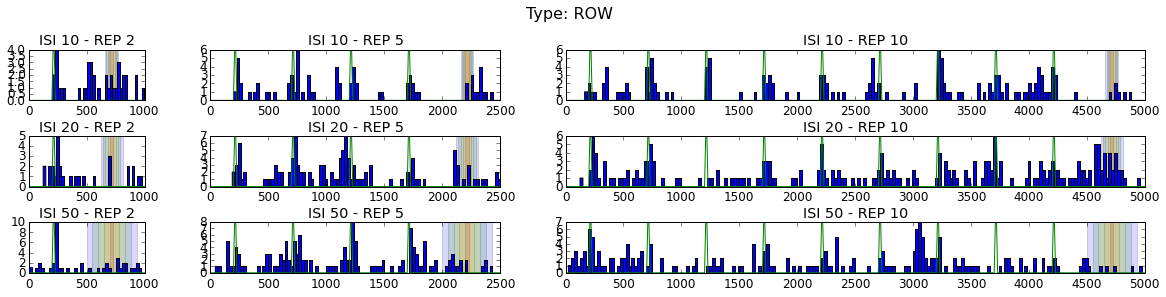

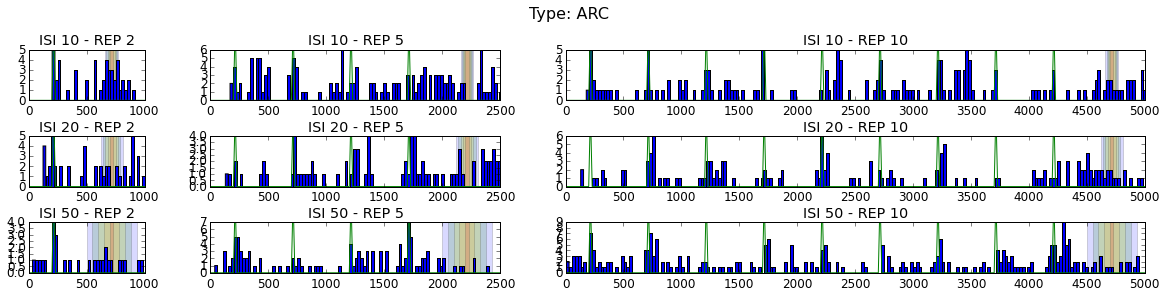

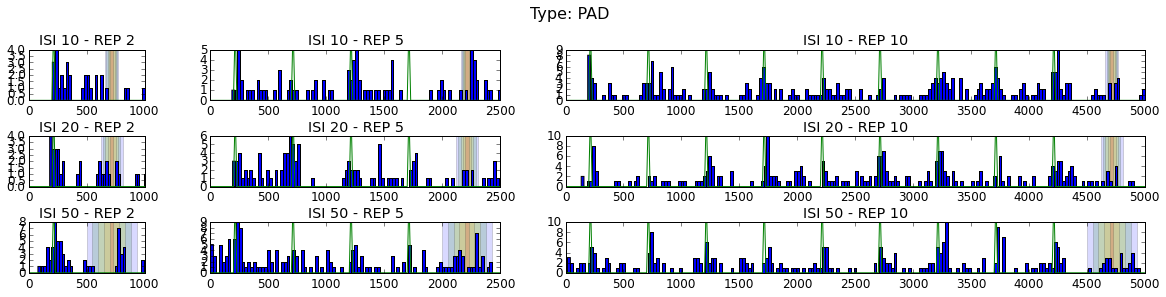

In [121]:
Folder = '/media/matias/DATA/WORKSPACE2/Expect_git/data/'

pickle = 'psthdata567_2'
#pickle = 'EXP_3_m1_s3'
#pickle = 'EXP_3_m1_s4'
#pickle = 'EXP_3_m2_s4'


file = Folder + pickle
    
PSTH_data = load_obj(file)

#--------------------------------------------------
def build_stim(rep, isi,ylim):
    
    onestim =  np.append(arange(10),np.ones(11)*10, axis=0)
    onestim = np.append(onestim,arange(9,-1,-1),axis=0)*ylim/10
    ttot = rep*500
    stim = np.zeros(ttot)
    phase = isi*4
    
    shift=0
    
    if isi ==10:
        shift = 160
    elif isi==20:
        shift=120
    
    for p in 500*arange(rep-1)+phase+shift:
        stim[p:p+31] = onestim
    
    return stim
#--------------------------------------------------

from matplotlib import gridspec
matplotlib.rcParams.update({'font.size': 12})

#--------------------------------------------------
def plotter(pad,last):
#p=0
#for pad in ['ROW']:#['ROW','ARC','PAD']:
#   p+=1
    rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
    
    fig = figure(figsize=(20,4))
    i=0
    for isi in [10,20,50]:
        i+=1
        r=0
        
        #r=1
        
        for rep in [2,5,10]:#[2,5,10]:
            r+=1 
            
            rangoticks =np.arange(0, rep*500+1, 500)
            shift = [160,120,0]
            
            if last==0:
                ratios = [2,5,10]
                bins = 20*rep
                xmin=0
                div=.5
                
            else:
                ratios = [1,1,1]
                bins= 125#*last
                xmin = (rep-last)*500
                div=2
                
            
            data1 = np.array(ps[n][types]['hold'][pad][rep][isi])+ shift[i-1]
            data = data1[where(data1>xmin)]
            
            gs = gridspec.GridSpec(3,3, width_ratios=ratios, hspace = 0.7) 
            ax = subplot(gs[r+(i-1)*3-1])            
            
            for k in range(5):
                ax.axvspan( (rep-1)*500 + isi*k + shift[i-1],shift[i-1]+ (rep-1)*500  + 8*isi+ 30 -isi*k, alpha=0.15, facecolor=rainbow[k])
            
            n1 = ax.hist(data, bins=bins)
            
            ylim = max(n1[0])
            
            ax.set_title('ISI ' + str(isi) +' - REP ' + str(rep))
            fig.suptitle('Type: '+ pad, fontsize = 16,y =1.05)
            ax.xaxis.set_ticks(rangoticks)
            
            ax.set_xlim(xmin, rep*500)
            
            stim = build_stim(rep,isi,ylim)
            plot(stim)
    
    Folder = '/media/matias/DATA/WORKSPACE2/OUTPUT/EXP_2'
    titles = 'fast_spiker_' + str(pad)
    fig.savefig(Folder + titles + '_hist.pdf', format='pdf')
            
#--------------------------------------------------
#neuron
idx = sort(list(PSTH_data.keys()))
print(idx)
ps = PSTH_data

n = idx[6]    #neuron
t=0           #stim type
span = [0]#[2,1,0]

for last in span:

    t_list=['Normal','Ctrl1','Ctrl2']
    types = t_list[t]
    for pad in ['ROW','ARC','PAD']:#['ROW','ARC','PAD']:
        plotter(pad, last)
            


print(ps[n].keys())
ps[n].Normal.keys()            
print(n)

In [ ]:

















Folder = '/media/matias/DATA/WORKSPACE2/Expect_git/data/'
file = Folder + 'psthdata5672'

PSTH_data = load_obj(file)

def build_stim(rep, isi):
    
    onestim =  np.append(arange(10),np.ones(10)*10, axis=0)
    onestim = np.append(onestim,arange(9,-1,-1),axis=0)
    
    ttot = rep*500
    stim = np.zeros(ttot)
    
    phase = isi*4
    
    
    
    for p in 500*arange(rep)+phase:
        stim[p:p+30] = onestim
    
    
    return stim


idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[-3]

print(ps[n].keys())

ps[n].Normal.keys()

fig = figure(figsize=(20,5))

rep=2
isi=20
pad='ARC'

n1 =hist(ps[n].Ctrl2.hold[pad][rep][isi], bins=100)
stim = build_stim(rep,isi)

plot(stim)

print(n)
#xlim(650,850)

In [ ]:
ps[n]

a[0:2]# Define and load data files from experiments

In [ ]:
global binname, textname
#---------------------------------------------------------------------------------------
SelExp = [2]                         #select experiment numbers!
grupete = [2]   #select cluster groups! 2 for good clusters 1 for multiunits, 3 for unsorted

#select measurement and/or shanks!
Measurements = m764[0:1]           #['m1s1']#['m3s1','m3s3']#m12[-4:]#['m1s1','m1s2','m1s3','m1s4']   

rootF = '/media/matias/DATA/WORKSPACE2/'    

dirs =[]
#--------------------------------------------------------------------------------
# Loop Experiments
#--------------------------------------------------------------------------------
last_expe=0     #we use this to load stim only when we change experiment
for expe in SelExp:
    
    PSTHall = {}
    PSTHdata = {}
    PSTH_spikes_counts = {}
    
    #Measurements = sorted(Expe[expe])                         #uncommento to select all
    print('Experiment: ', expe)
   
    last_meas =0   #we use this to find when we change measurement to load Vtag and stim again
    
    #--------------------------------------------------------------------------------
    #loop goodunits, multiunits, unsorted...
    for group in grupete:   #2 for good clusters 1 for multiunits 3 for unsorted
        #folder names
        if group ==3:
            dirs  = [rootF + 'OUTPUT/EXP_'+str(expe)]
        if group ==2:
            dirs  = [rootF + 'OUTPUT/EXP_'+str(expe)]
        if group ==1:
            dirs  = [rootF + 'OUTPUT/EXP_'+str(expe)]
        #--------------------------------------------------------------------------------
        #create output folders
        for dir in dirs:
            if not os.path.exists(dir):
                os.makedirs(dir) 
        dire = dirs[0] +'/'
        titles = 'Exp'+ str(expe) + '_Meas_' + meas[1] + '_Shank_' + meas[3]
        #--------------------------------------------------------------------------------
        print('Group:', group)
        #--------------------------------------------------------------------------------
        #loop measurements and shanks
        #Measurements = sorted((Expe[expe]))
        
        for meas in Measurements:           
            print(meas)
            current_meas = int(meas[1])   #measurement number
            #---------------------------------------------------------------
            #This is to account for diffrerent stims when looping diffrerent experiments
            if current_meas!=last_meas:
                stimfile = rootF + 'EXP_' + str(expe) + '/' + stimfiles[expe][current_meas-1]
                timefile = rootF + 'EXP_' + str(expe) + '/' +timefiles[expe][current_meas-1]
                epfile = rootF + 'EXP_' + str(expe) + '/' +eptimefiles[expe][current_meas-1]
                
                Stims = build_dict_stim(stimfile, timefile, epfile)
          
            
            #select datafile
            sp_file = rootF + 'EXP_' + str(expe) +'/Spike_Sort/'+ meas +'/'+ Expe[expe][meas]
            #load datafile
            Spikes, sampling_freq = readkwikinfo(sp_file, group)  
                    
            if len(Spikes.keys())>0:                              #do only if there are clusters
                #Build PSTHs
                print('   building psths')
    
                PSTH_data = BuildPSTH(Stims, Spikes, sampling_freq, expe, meas) 
            
            
            PSTHall.update(PSTH_data)
            
    print('   saving')
    if group == 2:
        filesave =rootF +'Expect_git/data/psthdata' + str(expe)
    else:
        filesave =rootF +'S2_git/data/'+ 'psthdataMultiR' + str(expe)
        
    save_obj(PSTHall,filesave)

In [ ]:
Folder = '/media/matias/DATA/WORKSPACE2/EXP_2'        
stimfile = Folder +'/EXPECT-151217-stims-7.txt'   
timefile = Folder +'/EXPECT-151217-times-7.txt'   
epfile = Folder +'/EXPECT-151217-ep_times-7.txt'   

Stims = build_dict_stim(stimfile, timefile, epfile)

print(Stims.keys())

h = build_hist_dict()

print(h.keys())
print(h.hist_logic)

print(Stims.st_logic)

Stims.st_rep.shape

Stims.stims_ep



print(h.keys())

print(h.hist_logic)

h.Normal.hold.ROW[2][10]

In [ ]:
Folder = '/media/matias/DATA/WORKSPACE2/Expect_git/data/'
file = Folder + 'psthdata2'

PSTH_data = load_obj(file)

def build_stim(rep, isi):
    
    onestim =  np.append(arange(10),np.ones(10)*10, axis=0)
    onestim = np.append(onestim,arange(9,-1,-1),axis=0)
    
    ttot = rep*500
    stim = np.zeros(ttot)
    
    phase = isi*4
    
    
    
    for p in 500*arange(rep)+phase:
        stim[p:p+30] = onestim
    
    
    return stim




idx = list(PSTH_data.keys())
print(idx)

ps = PSTH_data
n = idx[5]

print(ps[n].keys())

ps[n].Normal.keys()

fig = figure(figsize=(20,5))

rep=10
isi=10

n1 =hist(ps[n].Normal.hold.PAD[rep][isi], bins=200)
stim = build_stim(rep,isi)

plot(stim)

#xlim(650,850)

In [ ]:
stim = build_stim(5,10)
plot(stim[0:1000])

print(Stims.keys())

Stims.st_times[1]


In [ ]:
print(Stims.keys())

a=[]
for i in arange(15):
    a.extend(Stims.st_times[i])
    
plot(a,'o')
a[-1]-1171000
